In [2]:
%load_ext autoreload
%autoreload 2

import sys, os, logging
import numpy as np
from matplotlib import pyplot as plt
from pathlib import Path

from caiman.utils.utils import load_dict_from_hdf5

root_dir = Path.cwd()
if not root_dir in sys.path: sys.path.insert(0,str(root_dir))


from HierarchicalBayesInference_analysis import HierarchicalBayesInference_analysis
from utils import prepare_behavior_from_file, prepare_activity
# calculate_hsm, get_reliability, get_firingrate, detection_parameters, build_struct_PC_results, prepare_behavior_from_file, get_firingstats_from_trials, get_spikeNr

# %matplotlib ipympl

2024-12-11 12:59:09.097169: I tensorflow/core/util/port.cc:113] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-12-11 12:59:09.202152: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 AVX512F AVX512_VNNI AVX512_BF16 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [3]:
## general analysis parameters
nbin = 40
hierarchical = ['theta']
wrap = []

## data parameters
f = 15.
pathSession = '../../../data/579ad/Session10'
neuron = 395

In [9]:
pathBehavior = os.path.join(pathSession,'aligned_behavior.pkl')
bin_array = np.linspace(0,nbin-1,nbin)
behavior = prepare_behavior_from_file(pathBehavior,nbin=nbin,f=15.)

pathActivity = [os.path.join(pathSession,file) for file in os.listdir(pathSession) if (file.startswith('results_CaImAn') and 'redetected' in file and not ('compare' in file))][0]
ld = load_dict_from_hdf5(pathActivity)
S = ld['S'][neuron,:]
activity = prepare_activity(S,behavior['active'],behavior['trials'],nbin=nbin)

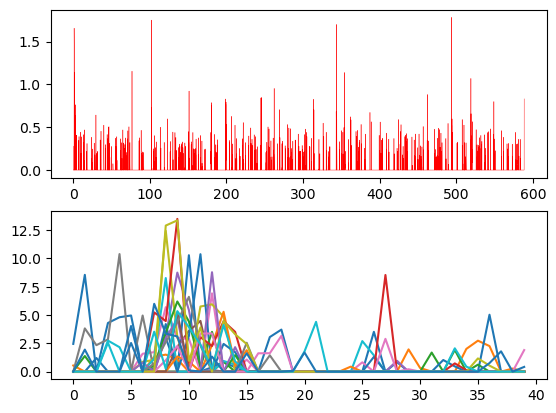

In [10]:
fig = plt.figure()
ax = fig.add_subplot(211)   
ax.plot(behavior['time_raw'],activity['S'],'r',linewidth=0.3)

ax = fig.add_subplot(212)
ax.plot(activity['trial_map'].T)
plt.show(block=False)

In [13]:
hierarchical=['theta']
wrap=[]

hbm = HierarchicalBayesInference_analysis(
	activity['spike_map'],
	behavior['trials']['dwelltime'],
	np.arange(nbin),
	logLevel=logging.ERROR,
)

hbm.set_priors(N_f=1,
	hierarchical_in=hierarchical,
	wrap=wrap)

results = hbm.run_sampling()

ready for analysis!


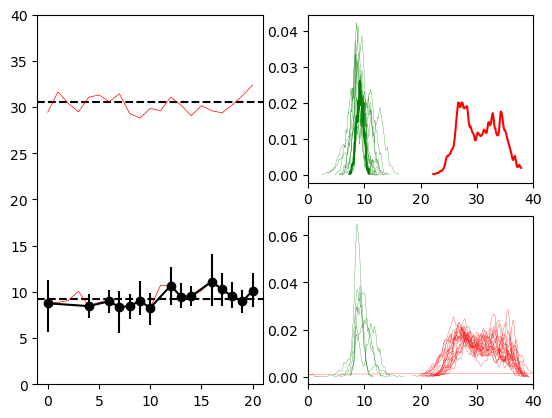

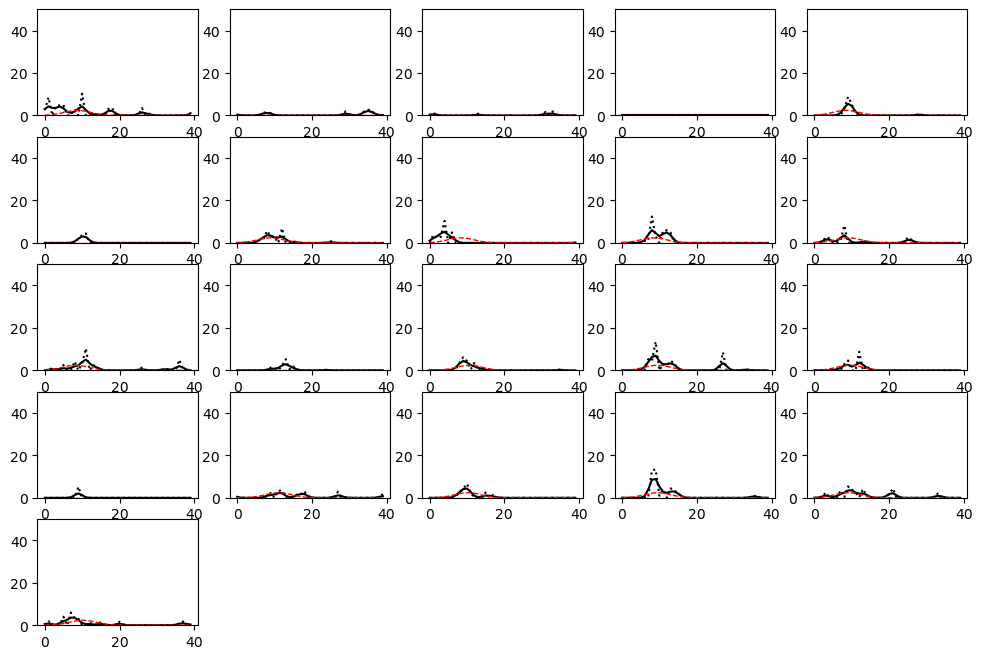

In [12]:
hbm.display_results(results)

[[[False  True False  True False False False False False False False
   False False False False  True False False False False False]]

 [[ True False False False  True  True  True  True  True  True  True
    True  True  True  True False  True  True  True  True  True]]

 [[ True False  True False False False False False False  True False
   False False  True False False  True False False  True False]]

 [[ True False False False False False False False False  True False
   False False  True False False  True False False  True False]]]


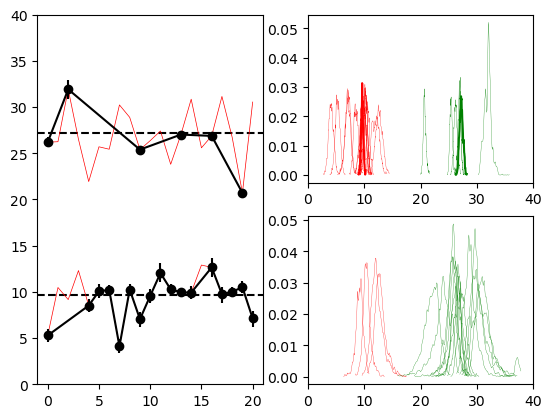

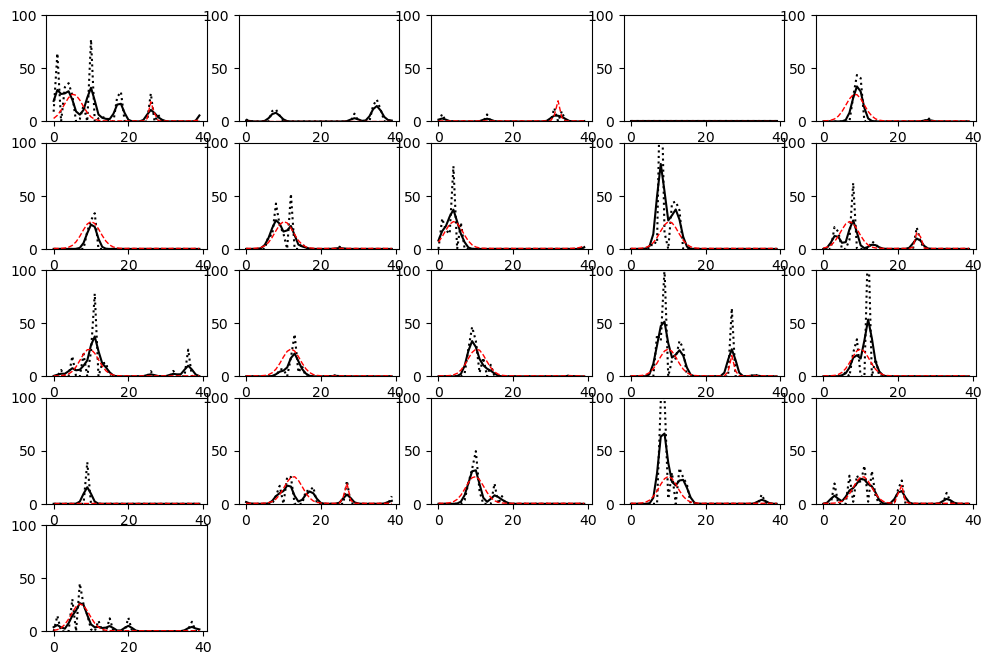

In [8]:
hbm.display_results(results)

In [ ]:

### target output:
'''
	for each model:
		posterior
			- distribution
			- mean, CI
		logz
        active_trials
'''
posterior = hbm.build_posterior(results)
results['logz']

nCells = 

for key in ['MI_value','MI_p_value','MI_z_score',
		'Isec_value','Isec_p_value','Isec_z_score',
		'SNR','r_value']:
	results['status'][key] = np.full(nCells,np.NaN)

nCells = activity
max_N_f = 2
n_trials = behavior['trials']['ct']

results['fields'] = {
	'parameter':        {
		'theta':	np.full((nCells,max_N_f,n_trials,4),np.NaN),          ### (mean,std,CI_low,CI_top)
	},
	# np.full((nCells,max_N_f,4,nStats),np.NaN),          ### (mean,std,CI_low,CI_top)
	'p_x':              np.full((nCells,max_N_f,nbin),0),##sp.sparse.COO((nCells,3,nbin)),#
	'posterior_mass':   np.full((nCells,max_N_f),np.NaN),
	'reliability':      np.full((nCells,max_N_f),np.NaN),
	'logz':			 	np.full((nCells,max_N_f),np.NaN),
	'Bayes_factor':     np.full((nCells,max_N_f,2),np.NaN),
	'nModes':           np.full(nCells,0).astype('int')
}

results['firingstats'] = {
	'rate':         np.full(nCells,np.NaN),
	'map':          np.zeros((nCells,nbin))*np.NaN,
	'std':          np.zeros((nCells,nbin))*np.NaN,
	'CI':           np.zeros((nCells,2,nbin))*np.NaN,
	'trial_map':    np.zeros((nCells,trial_ct,nbin))*np.NaN,
	'trial_field':  np.zeros((nCells,5,trial_ct),'bool'),
	'parNoise':     np.zeros((nCells,2))*np.NaN
}



# posterior = {
#     '''
# 		for each parameter, contains distribution, mean and CI
# 	'''
#     'theta'
# }
# posterior distribution and 

-868.0348024582913

In [12]:
mean = np.array(results['posterior']['mean'])[np.newaxis,:]

my_logp = hbm.set_logp_func()
my_logp(mean)

# test mean vs last value in samples (logp and parameters)

array([-1031.42401729])

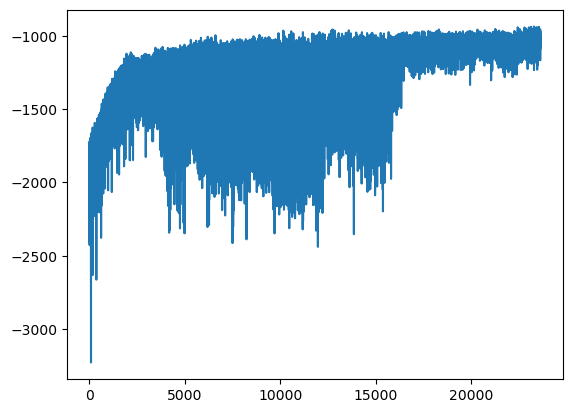

In [59]:
# results['weighted_samples']['points'][-1,:]
# idx = np.argmax(my_logp(results['weighted_samples']['points']))
# my_logp(results['samples'][-10:,:])
logps = my_logp(results['weighted_samples']['points'])
plt.plot(logps[1000:])
# my_logp(results['weighted_samples']['points'][idx,:])




In [60]:
from ultranest.plot import traceplot
traceplot(results)

KeyError: 'logvol'